In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [5]:
 y.shape

(70000,)

In [7]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

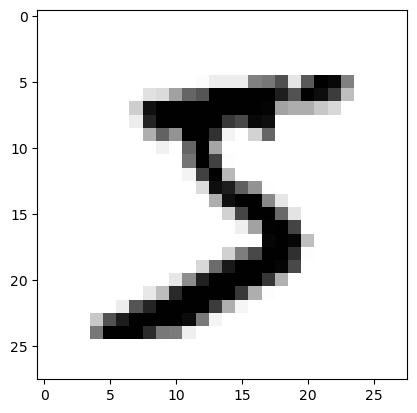

In [9]:
some_digit = X.iloc[0]  # Use .iloc[0] to access the first row
some_digit_image = some_digit.values.reshape(28, 28)  # If X is a pandas DataFrame, use .values to get the array
plt.imshow(some_digit_image, cmap="binary")

In [11]:
y[0]

'5'

In [13]:
y = y.astype(np.uint8)

In [15]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [17]:
y_train_5 = (y_train == 5) # True for all 5s, False for all other digits
y_test_5 = (y_test == 5)

In [19]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [20]:
sgd_clf.predict([some_digit])

C:\Users\Gul Khan\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

In [121]:

print("X_train shape:", X_train.shape)
print("y_train_5 shape:", y_train_5.shape)


y_train_5 = (y_train == 5)  


from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
from sklearn.linear_model import SGDClassifier


sgd_clf = SGDClassifier(random_state=42)


skfolds = StratifiedKFold(n_splits=3, random_state=42, shuffle=True)


for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    
    
    X_train_folds = X_train.iloc[train_index]
    y_train_folds = y_train_5.iloc[train_index]
    
    X_test_fold = X_train.iloc[test_index]
    y_test_fold = y_train_5.iloc[test_index]
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    
    n_correct = sum(y_pred == y_test_fold)
    print(f"Accuracy: {n_correct / len(y_pred):.4f}")


X_train shape: (56000, 784)
y_train_5 shape: (56000,)
Accuracy: 0.9394
Accuracy: 0.9579
Accuracy: 0.9071


In [25]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [26]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
 def fit(self, X, y=None): 
     return self
 def predict(self, X):
     return np.zeros((len(X), 1), dtype=bool)

In [29]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

In [31]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [32]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In [33]:
y_train_perfect_predictions = y_train_5 # pretend we reached perfection
confusion_matrix(y_train_5, y_train_perfect_predictions)


array([[54579,     0],
       [    0,  5421]], dtype=int64)

In [37]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred) # == 4096 / (4096 + 1522)

0.8370879772350012

In [39]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7325171197343847

In [41]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

C:\Users\Gul Khan\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([2164.22030239])

In [43]:
threshold = 8000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [45]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
 method="decision_function")

In [46]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

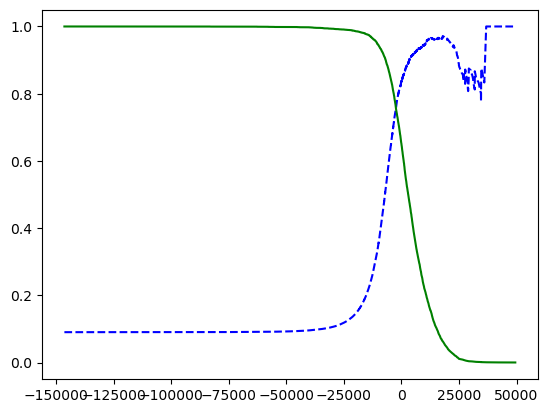

In [47]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
 plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
 plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
 [...] # highlight the threshold and add the legend, axis label, and grid
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [51]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)] # ~7816

In [53]:
y_train_pred_90 = (y_scores >= threshold_90_precision)

In [55]:
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [57]:
recall_score(y_train_5, y_train_pred_90)

0.4799852425751706

In [59]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

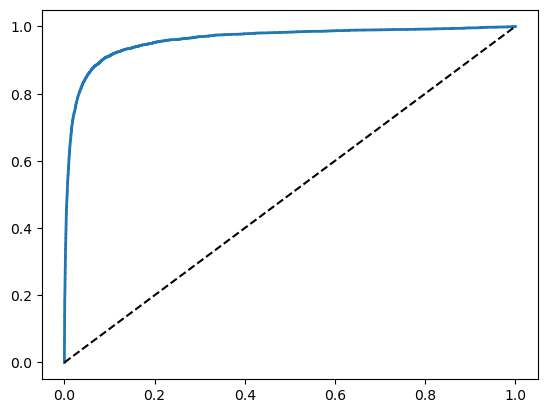

In [61]:
def plot_roc_curve(fpr, tpr, label=None):
 plt.plot(fpr, tpr, linewidth=2, label=label)
 plt.plot([0, 1], [0, 1], 'k--') # Dashed diagonal
 [...] # Add axis labels and grid
plot_roc_curve(fpr, tpr)
plt.show()


In [63]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9604938554008616

In [65]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
 method="predict_proba")

In [66]:
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

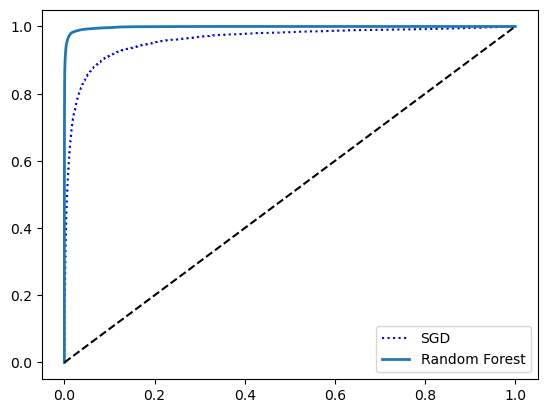

In [67]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

In [68]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

In [69]:
 from sklearn.svm import SVC
svm_clf = SVC()
svm_clf.fit(X_train, y_train) # y_train, not y_train_5
svm_clf.predict([some_digit])

C:\Users\Gul Khan\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([5], dtype=uint8)

In [74]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores

C:\Users\Gul Khan\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([[ 1.72501977,  2.72809088,  7.2510018 ,  8.3076379 , -0.31087254,
         9.3132482 ,  1.70975103,  2.76765202,  6.23049537,  4.84771048]])

In [75]:
np.argmax(some_digit_scores)

5

In [76]:
svm_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [77]:
svm_clf.classes_[5]

5

In [78]:
from sklearn.multiclass import OneVsRestClassifier
ovr_clf = OneVsRestClassifier(SVC())
ovr_clf.fit(X_train, y_train)

OneVsRestClassifier(estimator=SVC())

In [79]:
ovr_clf.predict([some_digit])

C:\Users\Gul Khan\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\Gul Khan\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\Gul Khan\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\Gul Khan\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\Gul Khan\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\Gul Khan\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with

array([5], dtype=uint8)

In [80]:
len(ovr_clf.estimators_)

10

In [81]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

C:\Users\Gul Khan\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([3], dtype=uint8)

In [82]:
sgd_clf.decision_function([some_digit])

C:\Users\Gul Khan\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([[-31893.03095419, -34419.69069632,  -9530.63950739,
          1823.73154031, -22320.14822878,  -1385.80478895,
        -26188.91070951, -16147.51323997,  -4604.35491274,
        -12050.767298  ]])

In [83]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

In [84]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.8983, 0.891 , 0.9018])

In [85]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5577,    0,   22,    5,    8,   43,   36,    6,  225,    1],
       [   0, 6400,   37,   24,    4,   44,    4,    7,  212,   10],
       [  27,   27, 5220,   92,   73,   27,   67,   36,  378,   11],
       [  22,   17,  117, 5227,    2,  203,   27,   40,  403,   73],
       [  12,   14,   41,    9, 5182,   12,   34,   27,  347,  164],
       [  27,   15,   30,  168,   53, 4444,   75,   14,  535,   60],
       [  30,   15,   42,    3,   44,   97, 5552,    3,  131,    1],
       [  21,   10,   51,   30,   49,   12,    3, 5684,  195,  210],
       [  17,   63,   48,   86,    3,  126,   25,   10, 5429,   44],
       [  25,   18,   30,   64,  118,   36,    1,  179,  371, 5107]],
      dtype=int64)

KNN Accuracy: 97.06%
SGD Accuracy: 87.34%
Random Forest Accuracy: 96.85%


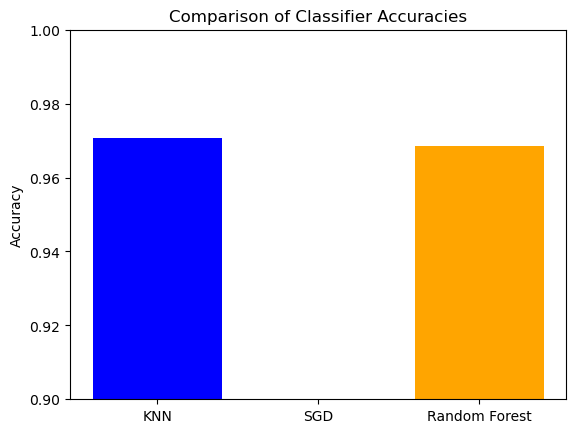

In [109]:

accuracy_knn = 0.9706428571428571
accuracy_sgd = 0.8734285714285714
accuracy_rf = 0.9685

# Print accuracies
print(f"KNN Accuracy: {accuracy_knn * 100:.2f}%")
print(f"SGD Accuracy: {accuracy_sgd * 100:.2f}%")
print(f"Random Forest Accuracy: {accuracy_rf * 100:.2f}%")
# Import necessary libraries
import matplotlib.pyplot as plt 



# Bar chart comparison
# ...
models = ['KNN', 'SGD', 'Random Forest']
accuracy_values = [accuracy_knn, accuracy_sgd, accuracy_rf]
plt.bar(models, accuracy_values, color=['blue', 'green', 'orange'])
# ...
# Bar chart comparison
models = ['KNN', 'SGD', 'Random Forest']
accuracy_values = [accuracy_knn, accuracy_sgd, accuracy_rf]

plt.bar(models, accuracy_values, color=['blue', 'green', 'orange'])
plt.title('Comparison of Classifier Accuracies')
plt.ylabel('Accuracy')
plt.ylim(0.90, 1.00)  # Set y-axis limits to focus on 90%-100% range
plt.show()

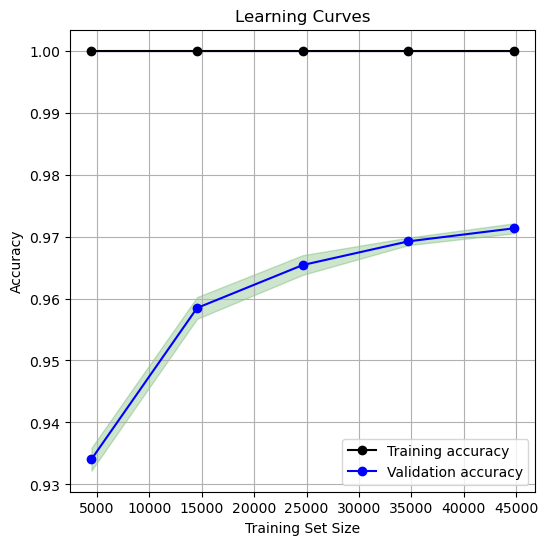

In [113]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np

# Load MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist["data"], mnist["target"].astype(np.uint8)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the KNN classifier
knn_clf = KNeighborsClassifier(n_neighbors=3, weights='distance')
knn_clf.fit(X_train, y_train)

# Function to plot learning curves
def plot_learning_curves(estimator, X, y):
    train_sizes, train_scores, val_scores = learning_curve(
        estimator, X, y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 5)
    )
    
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)
    
    plt.figure(figsize=(6, 6))
    plt.plot(train_sizes, train_mean, 'o-', color='black', label='Training accuracy')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
    
    plt.plot(train_sizes, val_mean, 'o-', color='blue', label='Validation accuracy')
    plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, color='green', alpha=0.2)
    
    plt.title('Learning Curves')
    plt.xlabel('Training Set Size')
    plt.ylabel('Accuracy')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

# Generate learning curves for the KNN classifier
plot_learning_curves(knn_clf, X_train, y_train)
